# MNIST DCGAN Example - Result

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow 2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[MDR-01]
Import modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models

####[MDR-02]
Mount your Google Drive on `/content/gdrive`.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDR-03]
Confirm that the exported model file `MNIST_double.hd5` is on your Google Drive.

In [4]:
!ls -lh '/content/gdrive/My Drive/gan_generator.hd5'

-rw------- 1 root root 2.4M May  8 05:55 '/content/gdrive/My Drive/gan_generator.hd5'


####[MDR-04]
Restore the model from the exported model file.

In [5]:
model = models.load_model('/content/gdrive/My Drive/gan_generator.hd5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 expand (Dense)              (None, 6272)              407680    
                                                                 
 leaky_relu1 (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 deconv1 (Conv2DTranspose)   (None, 14, 14, 64)        204864    
                                                                 
 leaky_relu2 (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 deconv2 (Conv2DTranspose)   (None, 28, 28, 1)         1601      
                                                                 
 flatten (Flatten)           (None, 784)               0

####[MDR-05]
Define a function to show generated images.

In [6]:
def show_images(images):
  fig = plt.figure(figsize=(len(images)*1.4, 1.4))
  for c, image in enumerate(images):
    subplot = fig.add_subplot(1, len(images), c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='bilinear')

####[MDR-06]
Show some random images.

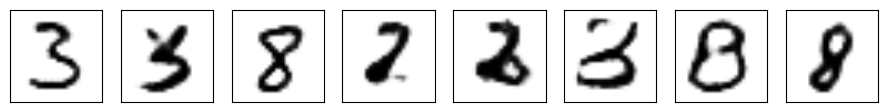

In [20]:
latent_dim = 64
random_inputs = 0.7 * np.random.rand(8, latent_dim) * 2.0 - 1.0
show_images(model.predict(random_inputs, verbose=0))

####[MDR-07]
Pick up two examples and generate interporated images.

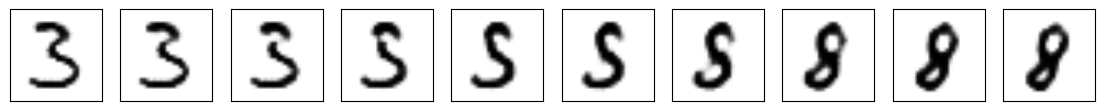

In [21]:
start, end = random_inputs[0], random_inputs[7]

interpolation = [np.linspace(s, e, 10) for s, e in zip(start, end)]
example = np.array([[x[c] for x in interpolation] for c in range(10)])
show_images(model.predict(example, verbose=0))

####[MDR-08]
Create an animation of dancing digits.

In [22]:
from matplotlib.animation import FuncAnimation

x = 0.7 * np.random.rand(3, latent_dim) * 2.0 - 1.0
inputs = []
theta1, theta2 = 0, 0
for _ in range(64):
    theta1 += 2*np.pi / 64 * 2
    theta2 += 2*np.pi / 64
    inputs.append(np.cos(theta1) * x[0] + \
        np.sin(theta1)*(np.cos(theta2)*x[1] + np.sin(theta2)*x[2]))
res = model.predict(np.array(inputs), verbose=0)

def create_frame(i):
    subplot.cla()
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(res[i].reshape([28, 28]), vmin=0, vmax=1, 
                   cmap=plt.cm.gray_r, interpolation='bilinear')

fig = plt.figure(figsize=(2, 2))
subplot = fig.add_subplot(1, 1, 1)
ani = FuncAnimation(fig, create_frame, frames=range(64), interval=10)
ani.save('DCGAN_morphing.gif')
plt.clf()

<Figure size 200x200 with 0 Axes>

####[MDR-09]
Show the animation.

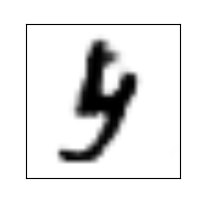

In [23]:
from IPython.display import Image

Image('DCGAN_morphing.gif', format='gif')